                                                              ESSORDI Mohammed
                                                                    IAi3D

In [3]:
import pandas as pd
df = pd.read_csv("student_depression_dataset.csv")

In [5]:
print(df.head())

   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3     

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [9]:
print(df.describe(include='all'))

                   id Gender           Age    City Profession  \
count    27901.000000  27901  27901.000000   27901      27901   
unique            NaN      2           NaN      52         14   
top               NaN   Male           NaN  Kalyan    Student   
freq              NaN  15547           NaN    1570      27870   
mean     70442.149421    NaN     25.822300     NaN        NaN   
std      40641.175216    NaN      4.905687     NaN        NaN   
min          2.000000    NaN     18.000000     NaN        NaN   
25%      35039.000000    NaN     21.000000     NaN        NaN   
50%      70684.000000    NaN     25.000000     NaN        NaN   
75%     105818.000000    NaN     30.000000     NaN        NaN   
max     140699.000000    NaN     59.000000     NaN        NaN   

        Academic Pressure  Work Pressure          CGPA  Study Satisfaction  \
count        27901.000000   27901.000000  27901.000000        27901.000000   
unique                NaN            NaN           NaN         

In [11]:
print(df.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [38]:
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

df = df.drop_duplicates()
df["Gender"] = df["Gender"].str.strip()
df["Profession"] = df["Profession"].str.strip()

def depression_level(x):
    return "Dépressif" if x == 1 else "Non-dépressif"

df["Depression_Level"] = df["Depression"].apply(depression_level)


Valeurs manquantes par colonne :
 id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Depression_Level                         0
dtype: int64


In [40]:
df_selected = df[["Gender", "Age", "Academic Pressure", "Sleep Duration", "CGPA", "Depression_Level"]]
print(df_selected.head())


   Gender   Age  Academic Pressure       Sleep Duration  CGPA Depression_Level
0    Male  33.0                5.0          '5-6 hours'  8.97        Dépressif
1  Female  24.0                2.0          '5-6 hours'  5.90    Non-dépressif
2    Male  31.0                3.0  'Less than 5 hours'  7.03    Non-dépressif
3  Female  28.0                3.0          '7-8 hours'  5.59        Dépressif
4  Female  25.0                4.0          '5-6 hours'  8.13    Non-dépressif


In [42]:
depressifs = df[df["Depression_Level"] == "Dépressif"]
print(depressifs.shape)  


(16336, 19)


In [44]:
def eval_sommeil(sleep):
    if "Less than 5 hours" in sleep or "5-6 hours" in sleep:
        return "Insuffisant"
    else:
        return "Normal"

df["Sleep_Quality"] = df["Sleep Duration"].apply(eval_sommeil)

In [46]:
cgpa_faible = df.sort_values("CGPA").head(10)
print(cgpa_faible[["CGPA", "Depression_Level"]])

       CGPA Depression_Level
25746  0.00        Dépressif
20913  0.00        Dépressif
14855  0.00    Non-dépressif
10407  0.00    Non-dépressif
11489  0.00        Dépressif
4365   0.00    Non-dépressif
26719  0.00    Non-dépressif
13909  0.00        Dépressif
21805  0.00    Non-dépressif
22934  5.03        Dépressif


In [48]:
print(df.groupby("Gender")["Depression_Level"].value_counts())

Gender  Depression_Level
Female  Dépressif           7221
        Non-dépressif       5133
Male    Dépressif           9115
        Non-dépressif       6432
Name: count, dtype: int64


In [50]:
print(df.groupby("Depression_Level")["Academic Pressure"].mean())

Depression_Level
Dépressif        3.693132
Non-dépressif    2.361608
Name: Academic Pressure, dtype: float64


In [53]:
stats = df[["Age", "Academic Pressure", "CGPA"]].describe()
print(stats)

                Age  Academic Pressure          CGPA
count  27901.000000       27901.000000  27901.000000
mean      25.822300           3.141214      7.656104
std        4.905687           1.381465      1.470707
min       18.000000           0.000000      0.000000
25%       21.000000           2.000000      6.290000
50%       25.000000           3.000000      7.770000
75%       30.000000           4.000000      8.920000
max       59.000000           5.000000     10.000000


In [55]:
correlation_matrix = df[["Academic Pressure", "CGPA", "Age", "Depression"]].corr()
print(correlation_matrix)

                   Academic Pressure      CGPA       Age  Depression
Academic Pressure           1.000000 -0.022239 -0.075803    0.474835
CGPA                       -0.022239  1.000000  0.005056    0.022210
Age                        -0.075803  0.005056  1.000000   -0.226422
Depression                  0.474835  0.022210 -0.226422    1.000000


In [59]:
pressure_by_depression = df.groupby("Depression_Level")["Academic Pressure"].mean()
print(pressure_by_depression)

Depression_Level
Dépressif        3.693132
Non-dépressif    2.361608
Name: Academic Pressure, dtype: float64


In [61]:
depression_by_gender = df.groupby("Gender")["Depression_Level"].value_counts()
print(depression_by_gender)

Gender  Depression_Level
Female  Dépressif           7221
        Non-dépressif       5133
Male    Dépressif           9115
        Non-dépressif       6432
Name: count, dtype: int64


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

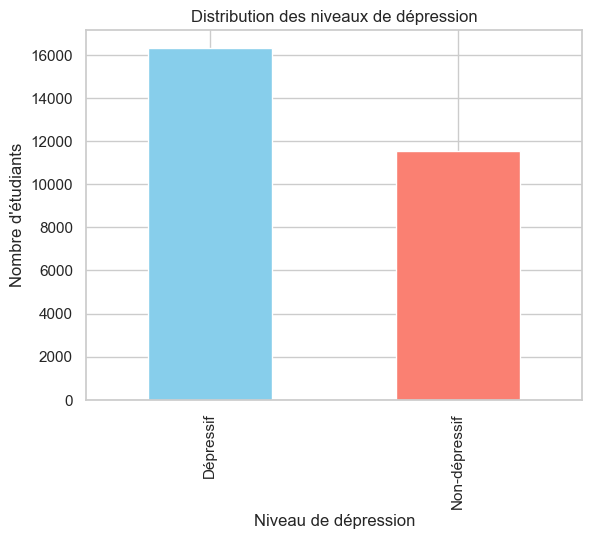

In [65]:
df["Depression_Level"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Distribution des niveaux de dépression")
plt.xlabel("Niveau de dépression")
plt.ylabel("Nombre d'étudiants")
plt.show()

C:\Users\ESSORDI\AppData\Local\Temp\ipykernel_24736\1641786844.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Depression_Level", y="Academic Pressure", data=df, palette="pastel")


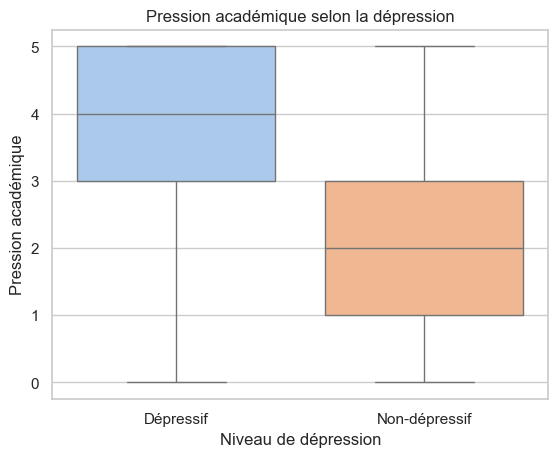

In [67]:
sns.boxplot(x="Depression_Level", y="Academic Pressure", data=df, palette="pastel")
plt.title("Pression académique selon la dépression")
plt.xlabel("Niveau de dépression")
plt.ylabel("Pression académique")
plt.show()

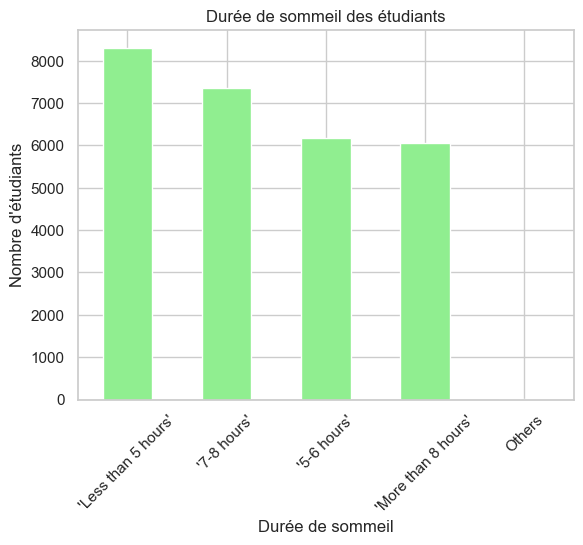

In [69]:
df["Sleep Duration"].value_counts().plot(kind="bar", color="lightgreen")
plt.title("Durée de sommeil des étudiants")
plt.xlabel("Durée de sommeil")
plt.ylabel("Nombre d'étudiants")
plt.xticks(rotation=45)
plt.show()


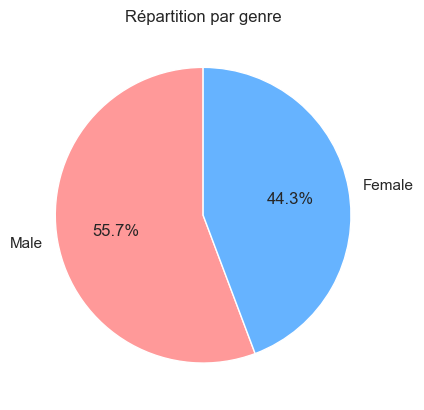

In [71]:
df["Gender"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=["#ff9999", "#66b3ff"])
plt.title("Répartition par genre")
plt.ylabel("")  
plt.show()


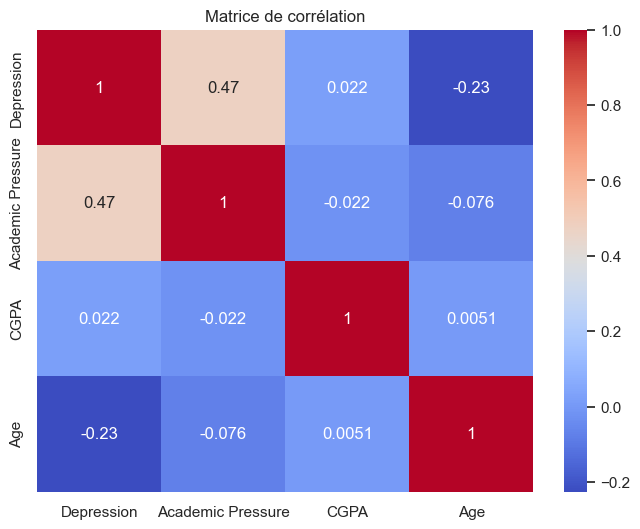

In [73]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[["Depression", "Academic Pressure", "CGPA", "Age"]].corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()
